<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/colab_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
import weather_lib as wlib


--2024-06-10 16:33:52--  https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3245 (3.2K) [text/plain]
Saving to: ‘weather_lib.py.2’

weather_lib.py.2    100%[===================>]   3.17K  --.-KB/s    in 0s      

2024-06-10 16:33:52 (45.3 MB/s) - ‘weather_lib.py.2’ saved [3245/3245]



A weather forecaster is like a sapper - 
he makes mistake only once,
but every day

Enter the city (if necessary, add country code separated by comma): Roma

Time in the Rome US: 12:33  10.06.2024
Sunrise:             05:21
Sunset:              20:41
Temperature Now:     from 14.4  to 14.8 °C
Weather:             light rain
Humidity:            82 %


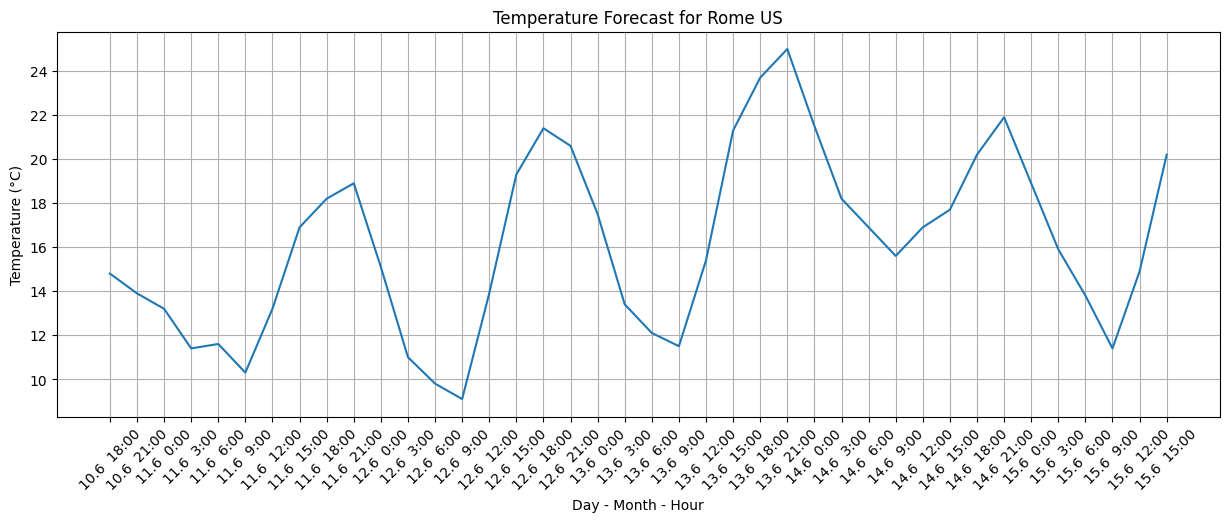

                     temp_min °C  temp_max °C  humidity %           weather
day_time                                                                   
10.06.2024    18:00         14.4         14.8          82        light rain
10.06.2024    21:00         13.4         13.9          81   overcast clouds
11.06.2024    00:00         13.2         13.2          80   overcast clouds
11.06.2024    03:00         11.4         11.4          85   overcast clouds
11.06.2024    06:00         11.6         11.6          86   overcast clouds
11.06.2024    09:00         10.3         10.3          92   overcast clouds
11.06.2024    12:00         13.2         13.2          86     broken clouds
11.06.2024    15:00         16.9         16.9          67   overcast clouds
11.06.2024    18:00         18.2         18.2          66   overcast clouds
11.06.2024    21:00         18.9         18.9          68     broken clouds
12.06.2024    00:00         15.1         15.1          86  scattered clouds
12.06.2024  

In [10]:
url = "https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/param_defolt.json"

defolt_parametrs = wlib.get_defolt_parametrs(url)
city = defolt_parametrs['params']['city']
units = defolt_parametrs['params']['units']
key = defolt_parametrs['params']['key']
hi = defolt_parametrs['welcome']['hi']

request = True
while request:

    print(hi)
    city = input('Enter the city (if necessary, add country code separated by comma): ')
    print()

    data = wlib.get_weather(city, units, key)
    if not data:
        print('Something is going wrong......')
    else:
        dt_txt_datetime, temp, temp_min, temp_max, humidity, description = wlib.data_to_lists(data)
        sunrise, sunset = wlib.get_sun_time(data)
        local_time = wlib.time_in_the_city(data)
        city = data['city']['name'] + ' ' + data['city']['country']

        print(f'Time in the {city}:'.ljust(20),  f'{local_time.strftime("%H:%M  %d.%m.%Y")}')
        print('Sunrise:'.ljust(20),  f'{sunrise.strftime("%H:%M")}')
        print('Sunset:'.ljust(20),  f'{sunset.strftime("%H:%M")}')
        print(f'Temperature Now:'.ljust(20),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
        print('Weather:'.ljust(20),  f'{description[0]}')
        print('Humidity:'.ljust(20),  f'{humidity[0]} %')

        wlib.plot_weather(dt_txt_datetime, temp, city)
        print(wlib.table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description))

    # weather chart covers the input field
    # want_add = input("Enter 1 to Continue or 0 to Exit: ")
    # request = (want_add == '1')
    request = False

